In [6]:
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
from isolation.hdf5 import H5Reader

In [7]:
def plot(df, dataset_name, var, plotconfig, obj):
    # style + disable warnings
    hep.style.use(hep.style.ROOT)
    import logging
    logging.getLogger('matplotlib').setLevel(logging.ERROR)

    if obj == 'muons':
        df_prompt = df[(df["iffClass"] == 4)]
        df_nonprompt = df[(df["iffClass"] != 4)]
        text_prompt = 'Prompt muons'
        text_nonprompt = 'Non-prompt muons'
    elif obj == 'muon_tracks':
        df_prompt = df[(df["ftagTruthTypeLabel"] == 5) | (df["ftagTruthTypeLabel"] == -5)]
        df_nonprompt = df[~(df["ftagTruthTypeLabel"] == 5) | (df["ftagTruthTypeLabel"] == -5)]
        text_prompt = 'Muon tracks'
        text_nonprompt = 'Other tracks'

    bin_settings = plotconfig['bins']
    logy = plotconfig['logy']

    f, ax = plt.subplots(figsize=(14, 7))
    hsig, bins = np.histogram(df_prompt[(df_prompt[var] > -99) & (df_prompt[var] > bin_settings[1]) & (df_prompt[var] < bin_settings[2])][var], bins=bin_settings[0], density=1)
    hbkg, bins = np.histogram(df_nonprompt[(df_nonprompt[var] > -99) & (df_nonprompt[var] > bin_settings[1]) & (df_nonprompt[var] < bin_settings[2])][var], bins=bins, density=1)
    hep.histplot((hsig, bins), label=text_prompt, ax=ax)
    hep.histplot(hbkg, bins=bins, label=text_nonprompt, ax=ax)
    plt.xlabel(var)
    plt.ylabel('Normalised entries')
    if logy: ax.set_yscale("log")
    hep.atlas.label(loc=4, label="Internal", ax=ax)
    plt.legend(loc="best")
    f.savefig(f'plot_{dataset_name}_{obj}_{var}.png') 

In [8]:
def doVRtrackjetPlots(fname, dataset_name, vars, plotconfigs):
    reader = H5Reader(fname, batch_size=10_000)
    data = reader.load({"muons": None, "muon_tracks": None}, num_leptons=100_000)
    len(data["muons"])

    leptons = data["muons"]
    df_leptons = pd.DataFrame(leptons)

    for var in vars:
        plot(df_leptons, dataset_name, var, plotconfigs[var], 'muons')

    

In [12]:
basepath = "/data/pgadow/atlas/pliv/ntuples/"

vars = ["caloClusterERel", "ptfrac_track", "ptrel_track", "dRtrackjet_track", "nTracksTrackjet"]
plotconfigs = {
    "caloClusterERel": {
        "bins": [60, 0, 30.0],
        "logy": False
    },
    "ptfrac_track": {
        "bins": [60, 0, 3.0],
        "logy": False
    },
    "ptrel_track": {
        "bins": [60, 0, 10_000],
        "logy": True
    },
    "dRtrackjet_track": {
        "bins": [60, 0, 0.4],
        "logy": True
    },
    "nTracksTrackjet": {
        "bins": [15, 0, 15],
        "logy": False
    },

}


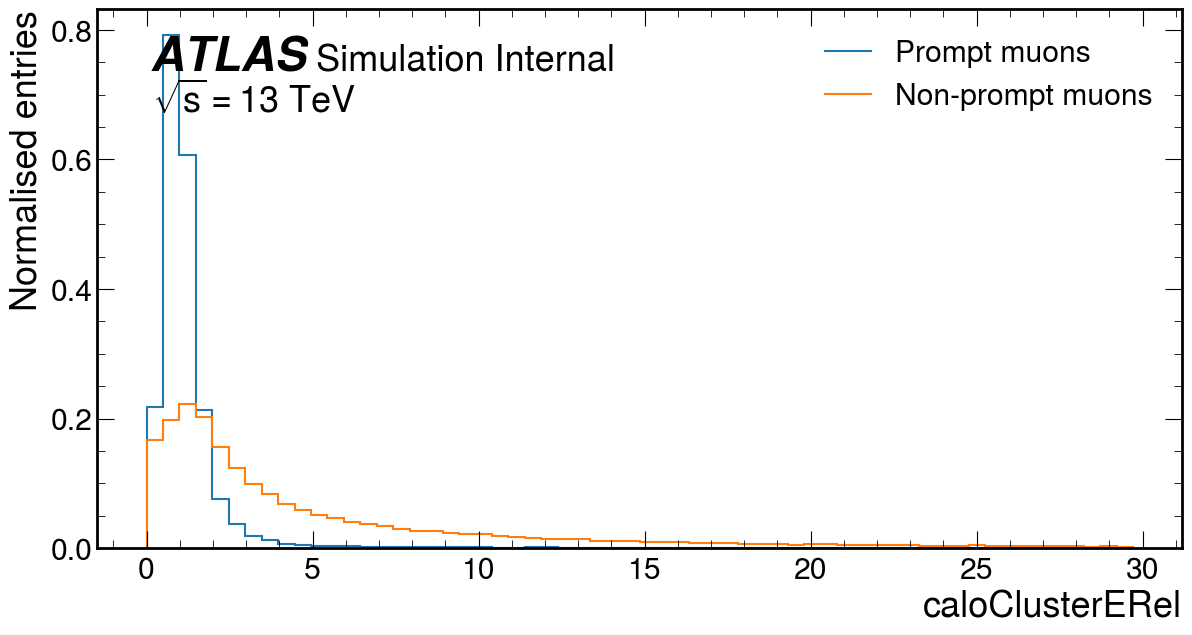

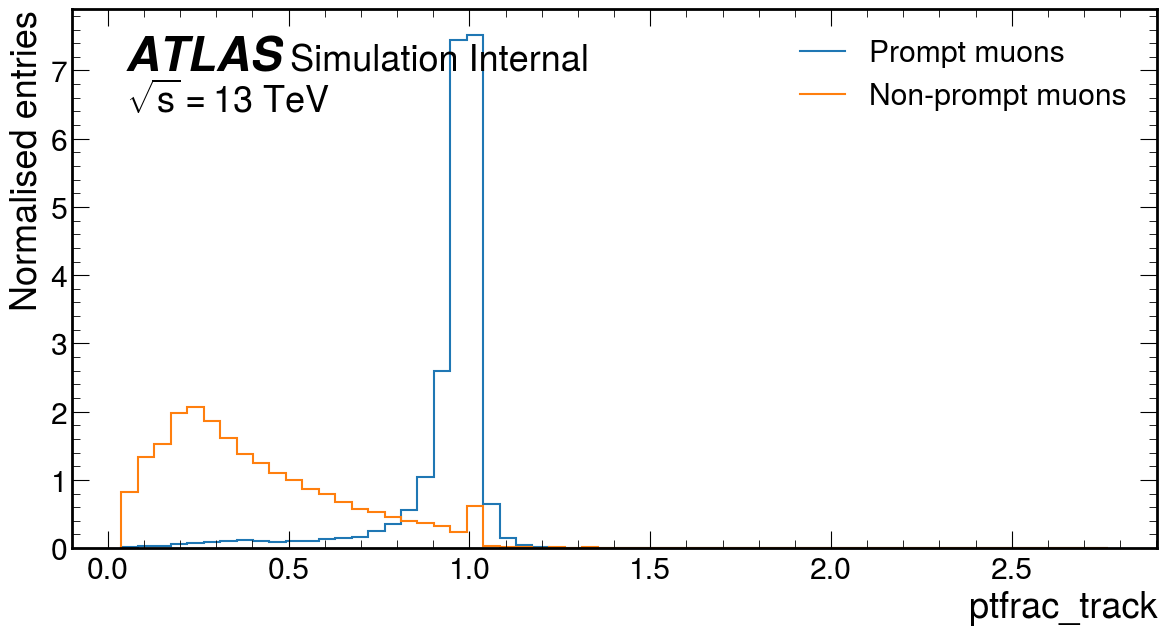

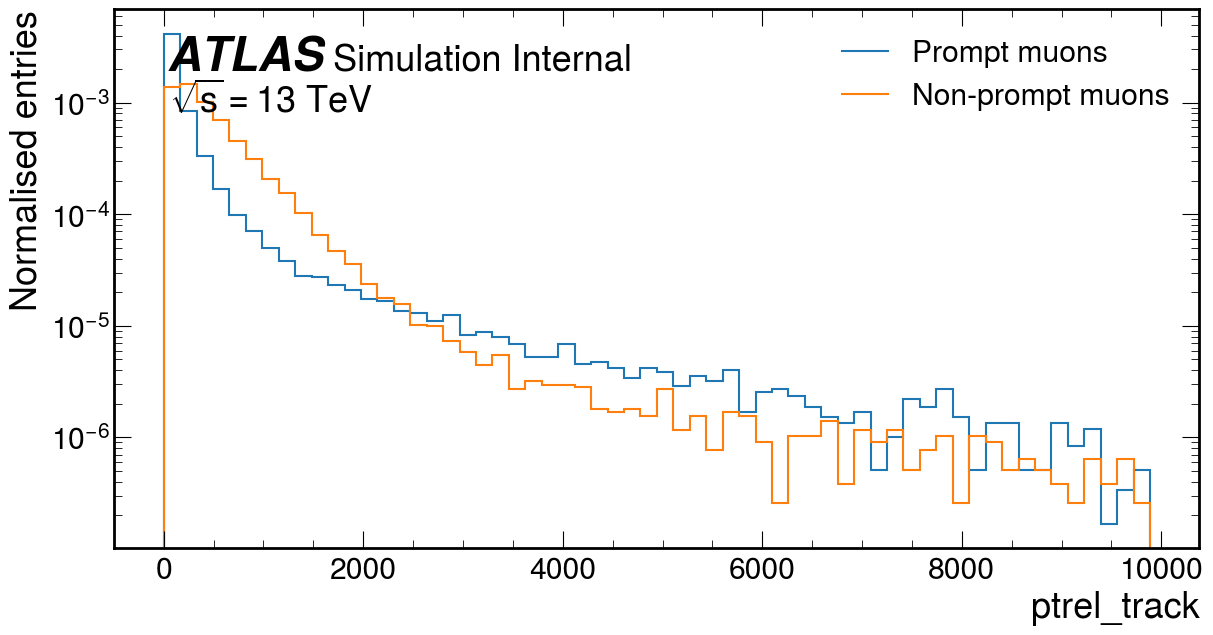

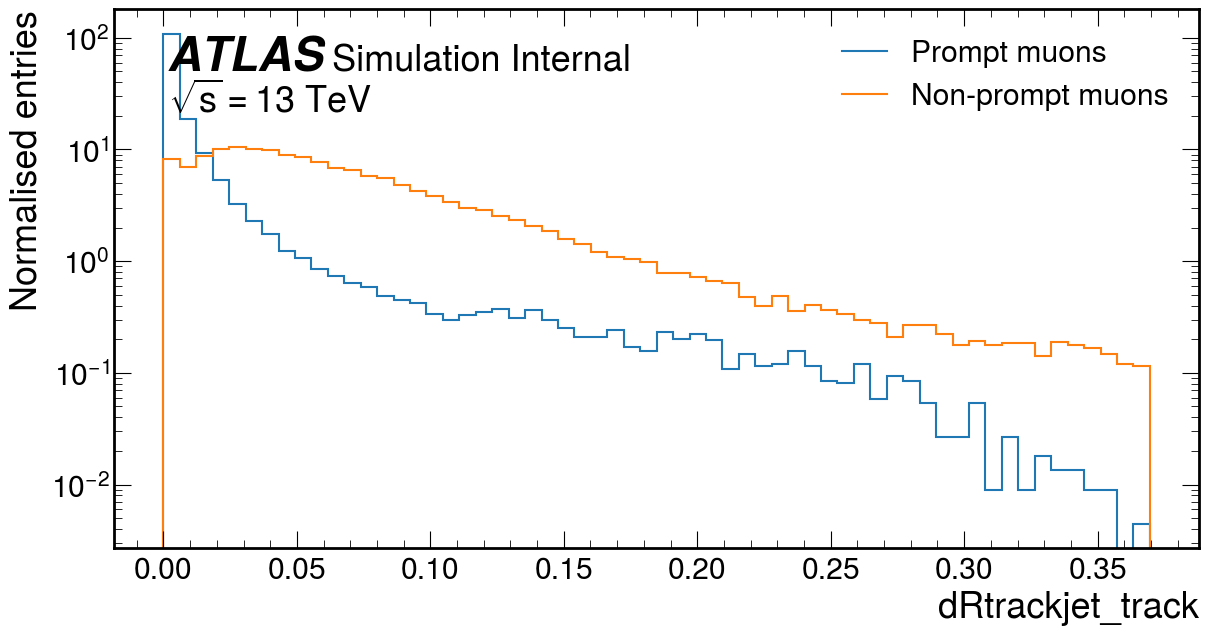

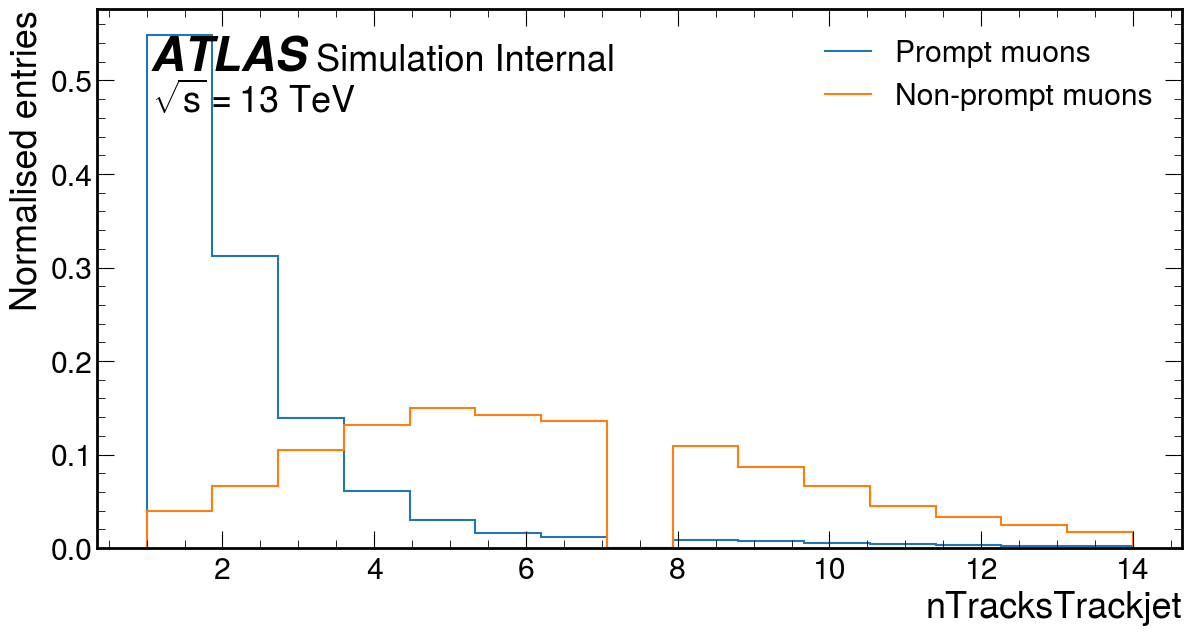

In [14]:
dataset = "user.pgadow.test_akt4pv0tj.410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.e6337_s3681_r13144_TREE"
dataset_name = "akt4pv0trackjets"
fname = basepath + dataset + "/*.h5"
doVRtrackjetPlots(fname, dataset_name, vars, plotconfigs)

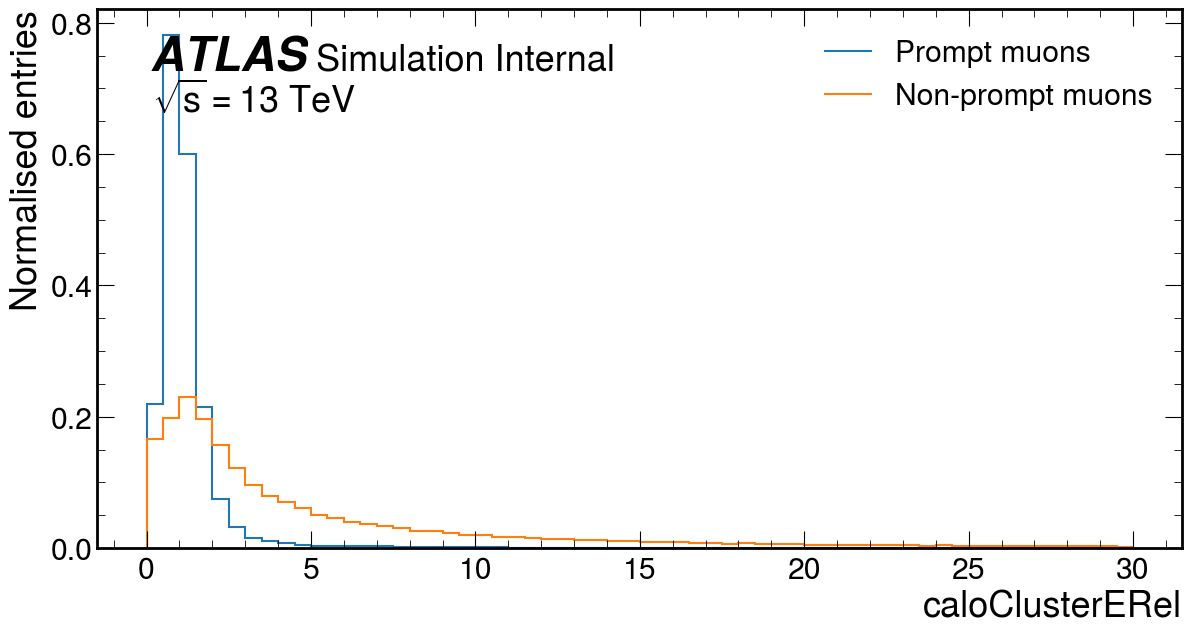

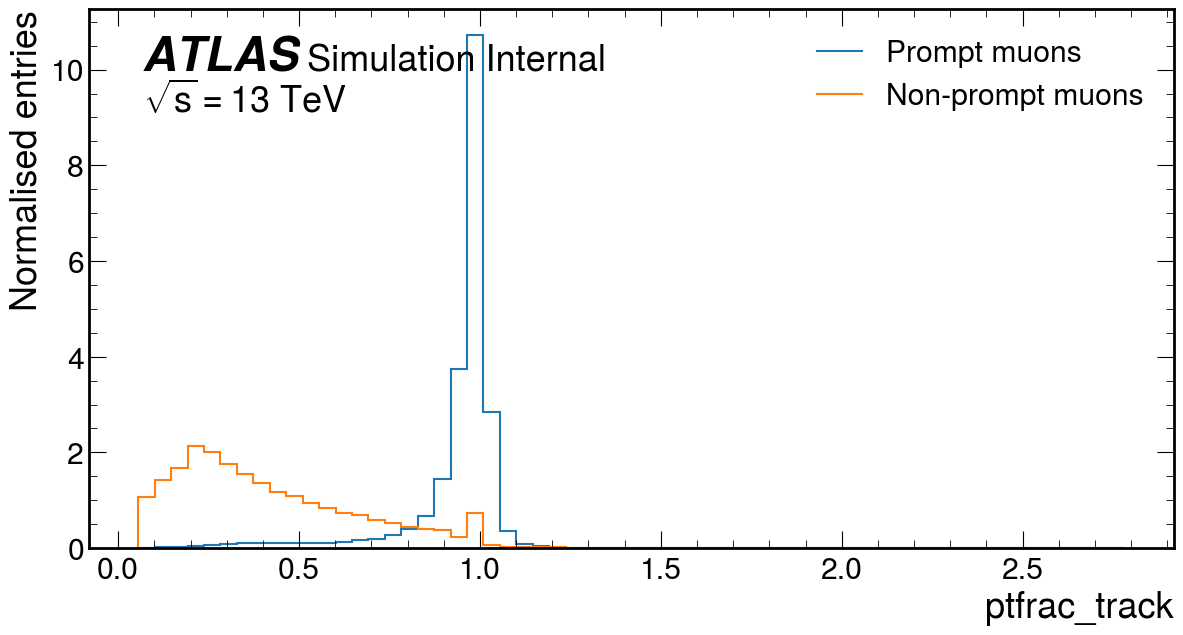

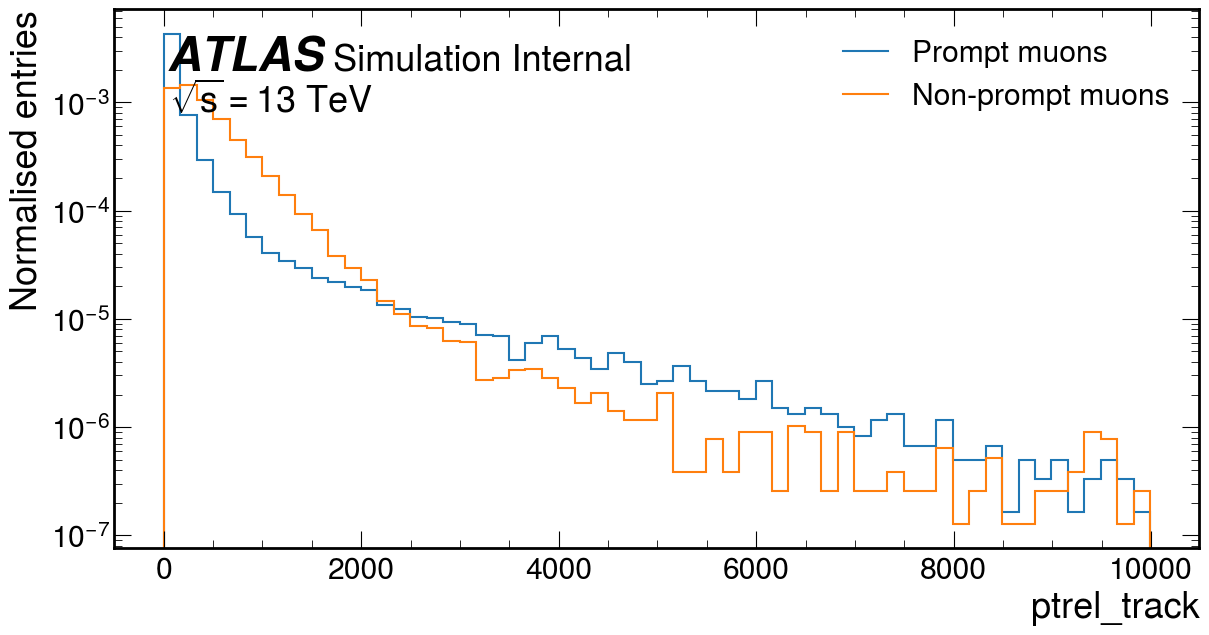

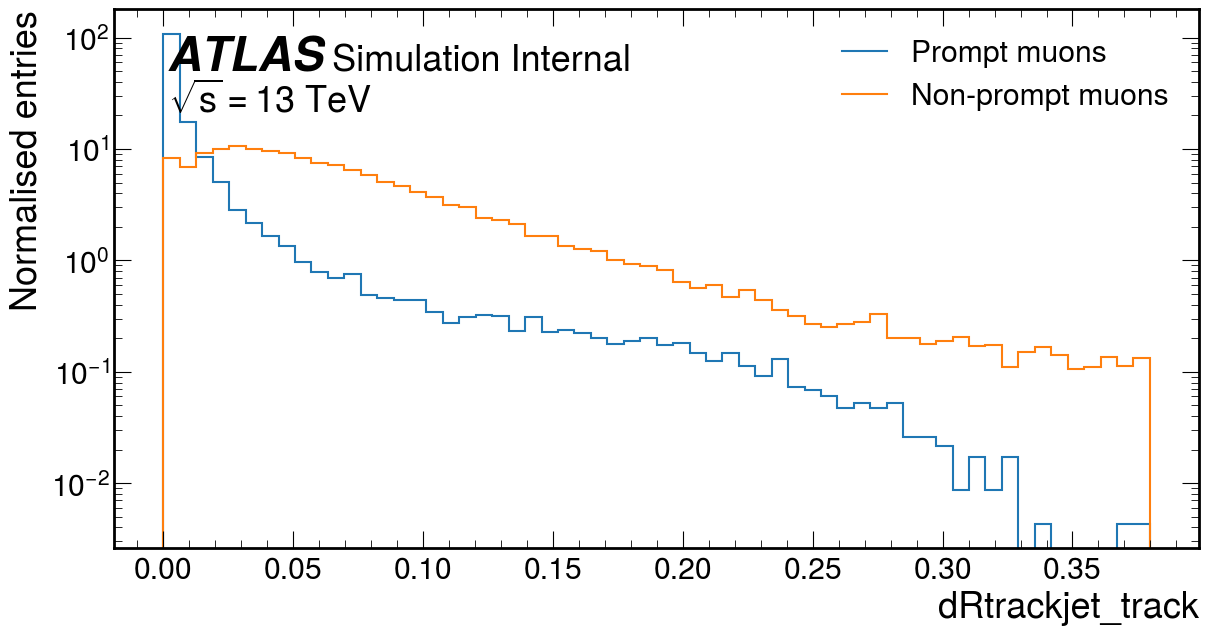

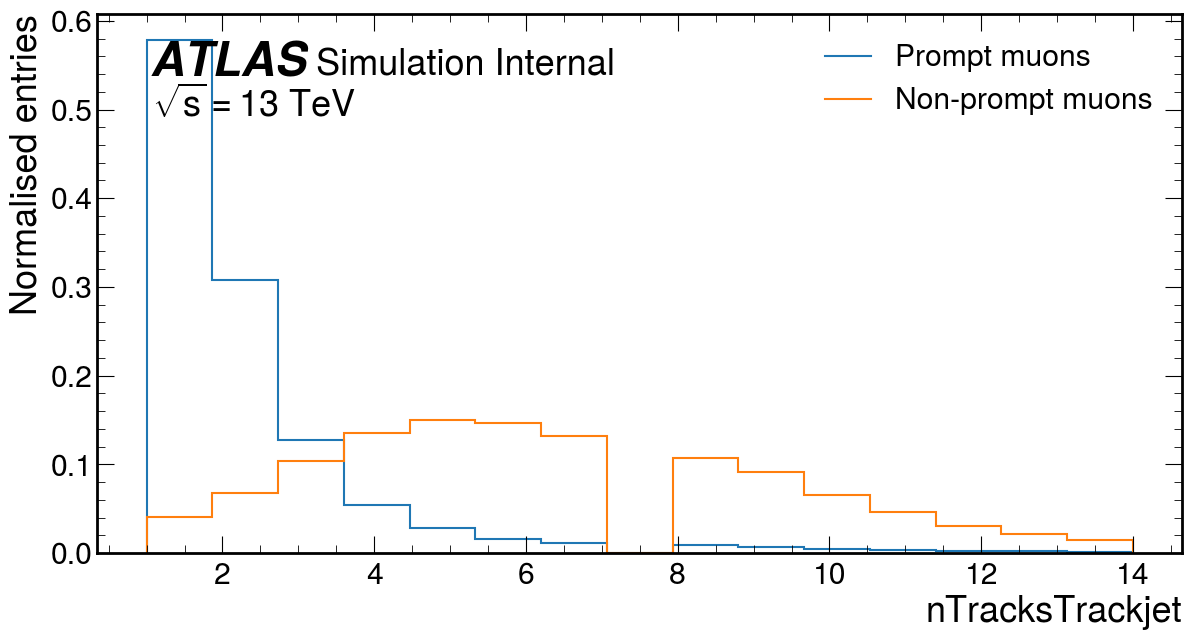

In [13]:
dataset = "user.pgadow.test_aktvrpv0tj.410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.e6337_s3681_r13144_TREE"
dataset_name = "aktvrpv0trackjets"
fname = basepath + dataset + "/*.h5"
doVRtrackjetPlots(fname, dataset_name, vars, plotconfigs)